# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [274]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [275]:
sc = StandardScaler()
sc.fit(X)

scaled_df = pd.DataFrame(sc.transform(X), columns=X.columns)
scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [276]:
X_8 = X.copy()
scaled_df_8 = scaled_df.copy()

In [277]:
km_fit_8 = KMeans(n_clusters=8, random_state=42)
km_fit_8.fit(scaled_df_8)

KMeans(random_state=42)

In [278]:
X_8["km8_clu"] = [str(x) for x in km_fit_8.labels_]
scaled_df_8["km8_clu"] = [str(x) for x in km_fit_8.labels_]

In [279]:
scaled_df_8.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,km8_clu
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,4


In [280]:
scaled_df_8['sil_k8'] = silhouette_samples(scaled_df_8.drop('km8_clu', axis=1), scaled_df_8['km8_clu'])

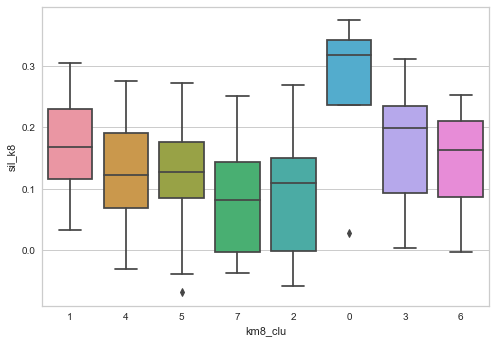

In [281]:
sns.boxplot(data = scaled_df_8, x = 'km8_clu', y = 'sil_k8');

In [282]:
scaled_df_8.groupby(['km8_clu'])['sil_k8'].mean().reset_index()

,km8_clu,sil_k8
0,0,0.260015
1,1,0.170075
2,2,0.088499
3,3,0.171612
4,4,0.121705
5,5,0.121521
6,6,0.146734
7,7,0.082621


In [283]:
silhouette_avg = silhouette_score(scaled_df_8.iloc[:, :-1], scaled_df_8['km8_clu'])
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.30667809429739584


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [284]:
scaled_df_5 = scaled_df.copy()

In [285]:
X_5 = X.copy()

In [286]:
km_fit_5 = KMeans(n_clusters=5, random_state=42)
km_fit_5.fit(scaled_df_5)

KMeans(n_clusters=5, random_state=42)

In [287]:
X_5["km5_clu"] = [str(x) for x in km_fit_5.labels_]
scaled_df_5["km5_clu"] = [str(x) for x in km_fit_5.labels_]

In [288]:
silhouette_avg_5 = silhouette_score(scaled_df_5.iloc[:, :-1], scaled_df_5['km5_clu'])
print("The average silhouette_score is :", silhouette_avg_5)

The average silhouette_score is : 0.22717325476244582


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [289]:
scaled_df_3 = scaled_df.copy()
X_3 = X.copy()

In [290]:
km_fit_3 = KMeans(n_clusters=3, random_state=42)
km_fit_3.fit(scaled_df_3)

KMeans(n_clusters=3, random_state=42)

In [291]:
X_3["km3_clu"] = [str(x) for x in km_fit_3.labels_]
scaled_df_3["km3_clu"] = [str(x) for x in km_fit_3.labels_]

In [292]:
silhouette_avg_3 = silhouette_score(scaled_df_3.iloc[:, :-1], scaled_df_3['km3_clu'])
print("The average silhouette_score is :", silhouette_avg_3)

The average silhouette_score is : 0.2848589191898986


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabasz**: ratio of within to between cluster dispersion

In [293]:
orig_cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

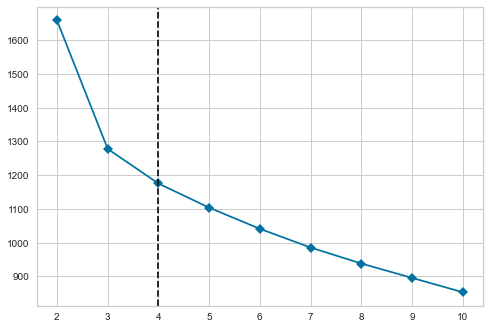

In [295]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False,  metric='distortion')

fit = km_opt.fit(scaled_df[orig_cols])

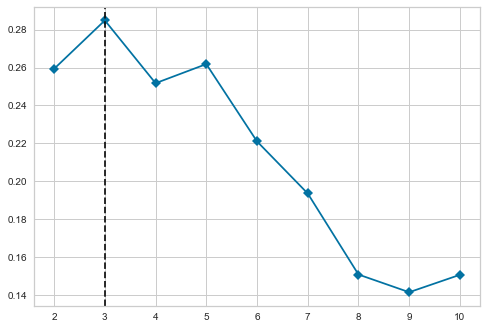

In [294]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False,  metric='silhouette')

fit = km_opt.fit(scaled_df[orig_cols])

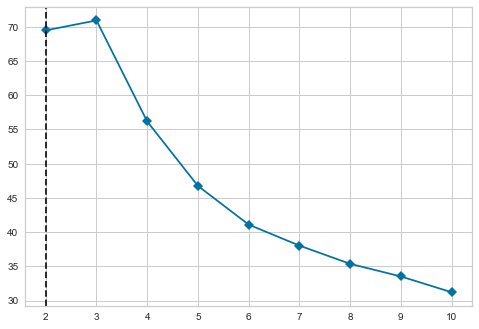

In [296]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False,  metric='calinski_harabasz')

fit = km_opt.fit(scaled_df[orig_cols])

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [297]:
from sklearn.cluster import AgglomerativeClustering

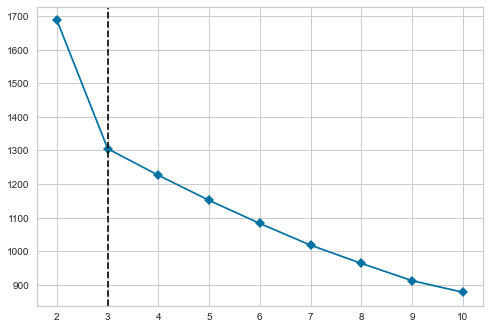

In [306]:
ac_fit = AgglomerativeClustering(affinity='euclidean', linkage='ward')
km_opt = KElbowVisualizer(ac_fit, n_clusters=(2, 11), timings = False,  metric='distortion')

fit = km_opt.fit(scaled_df[orig_cols])

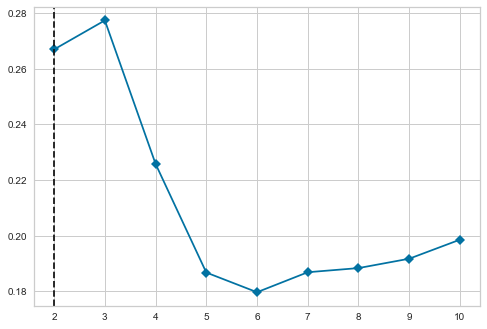

In [307]:
ac_fit = AgglomerativeClustering(affinity='euclidean', linkage='ward')
km_opt = KElbowVisualizer(ac_fit, n_clusters=(2, 11), timings = False,  metric='silhouette')

fit = km_opt.fit(scaled_df[orig_cols])

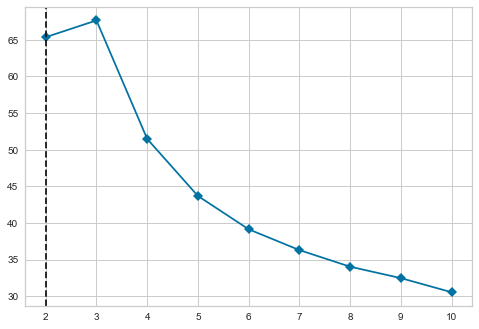

In [308]:
ac_fit = AgglomerativeClustering(affinity='euclidean', linkage='ward')
km_opt = KElbowVisualizer(ac_fit, n_clusters=(2, 11), timings = False,  metric='calinski_harabasz')

fit = km_opt.fit(scaled_df[orig_cols])

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

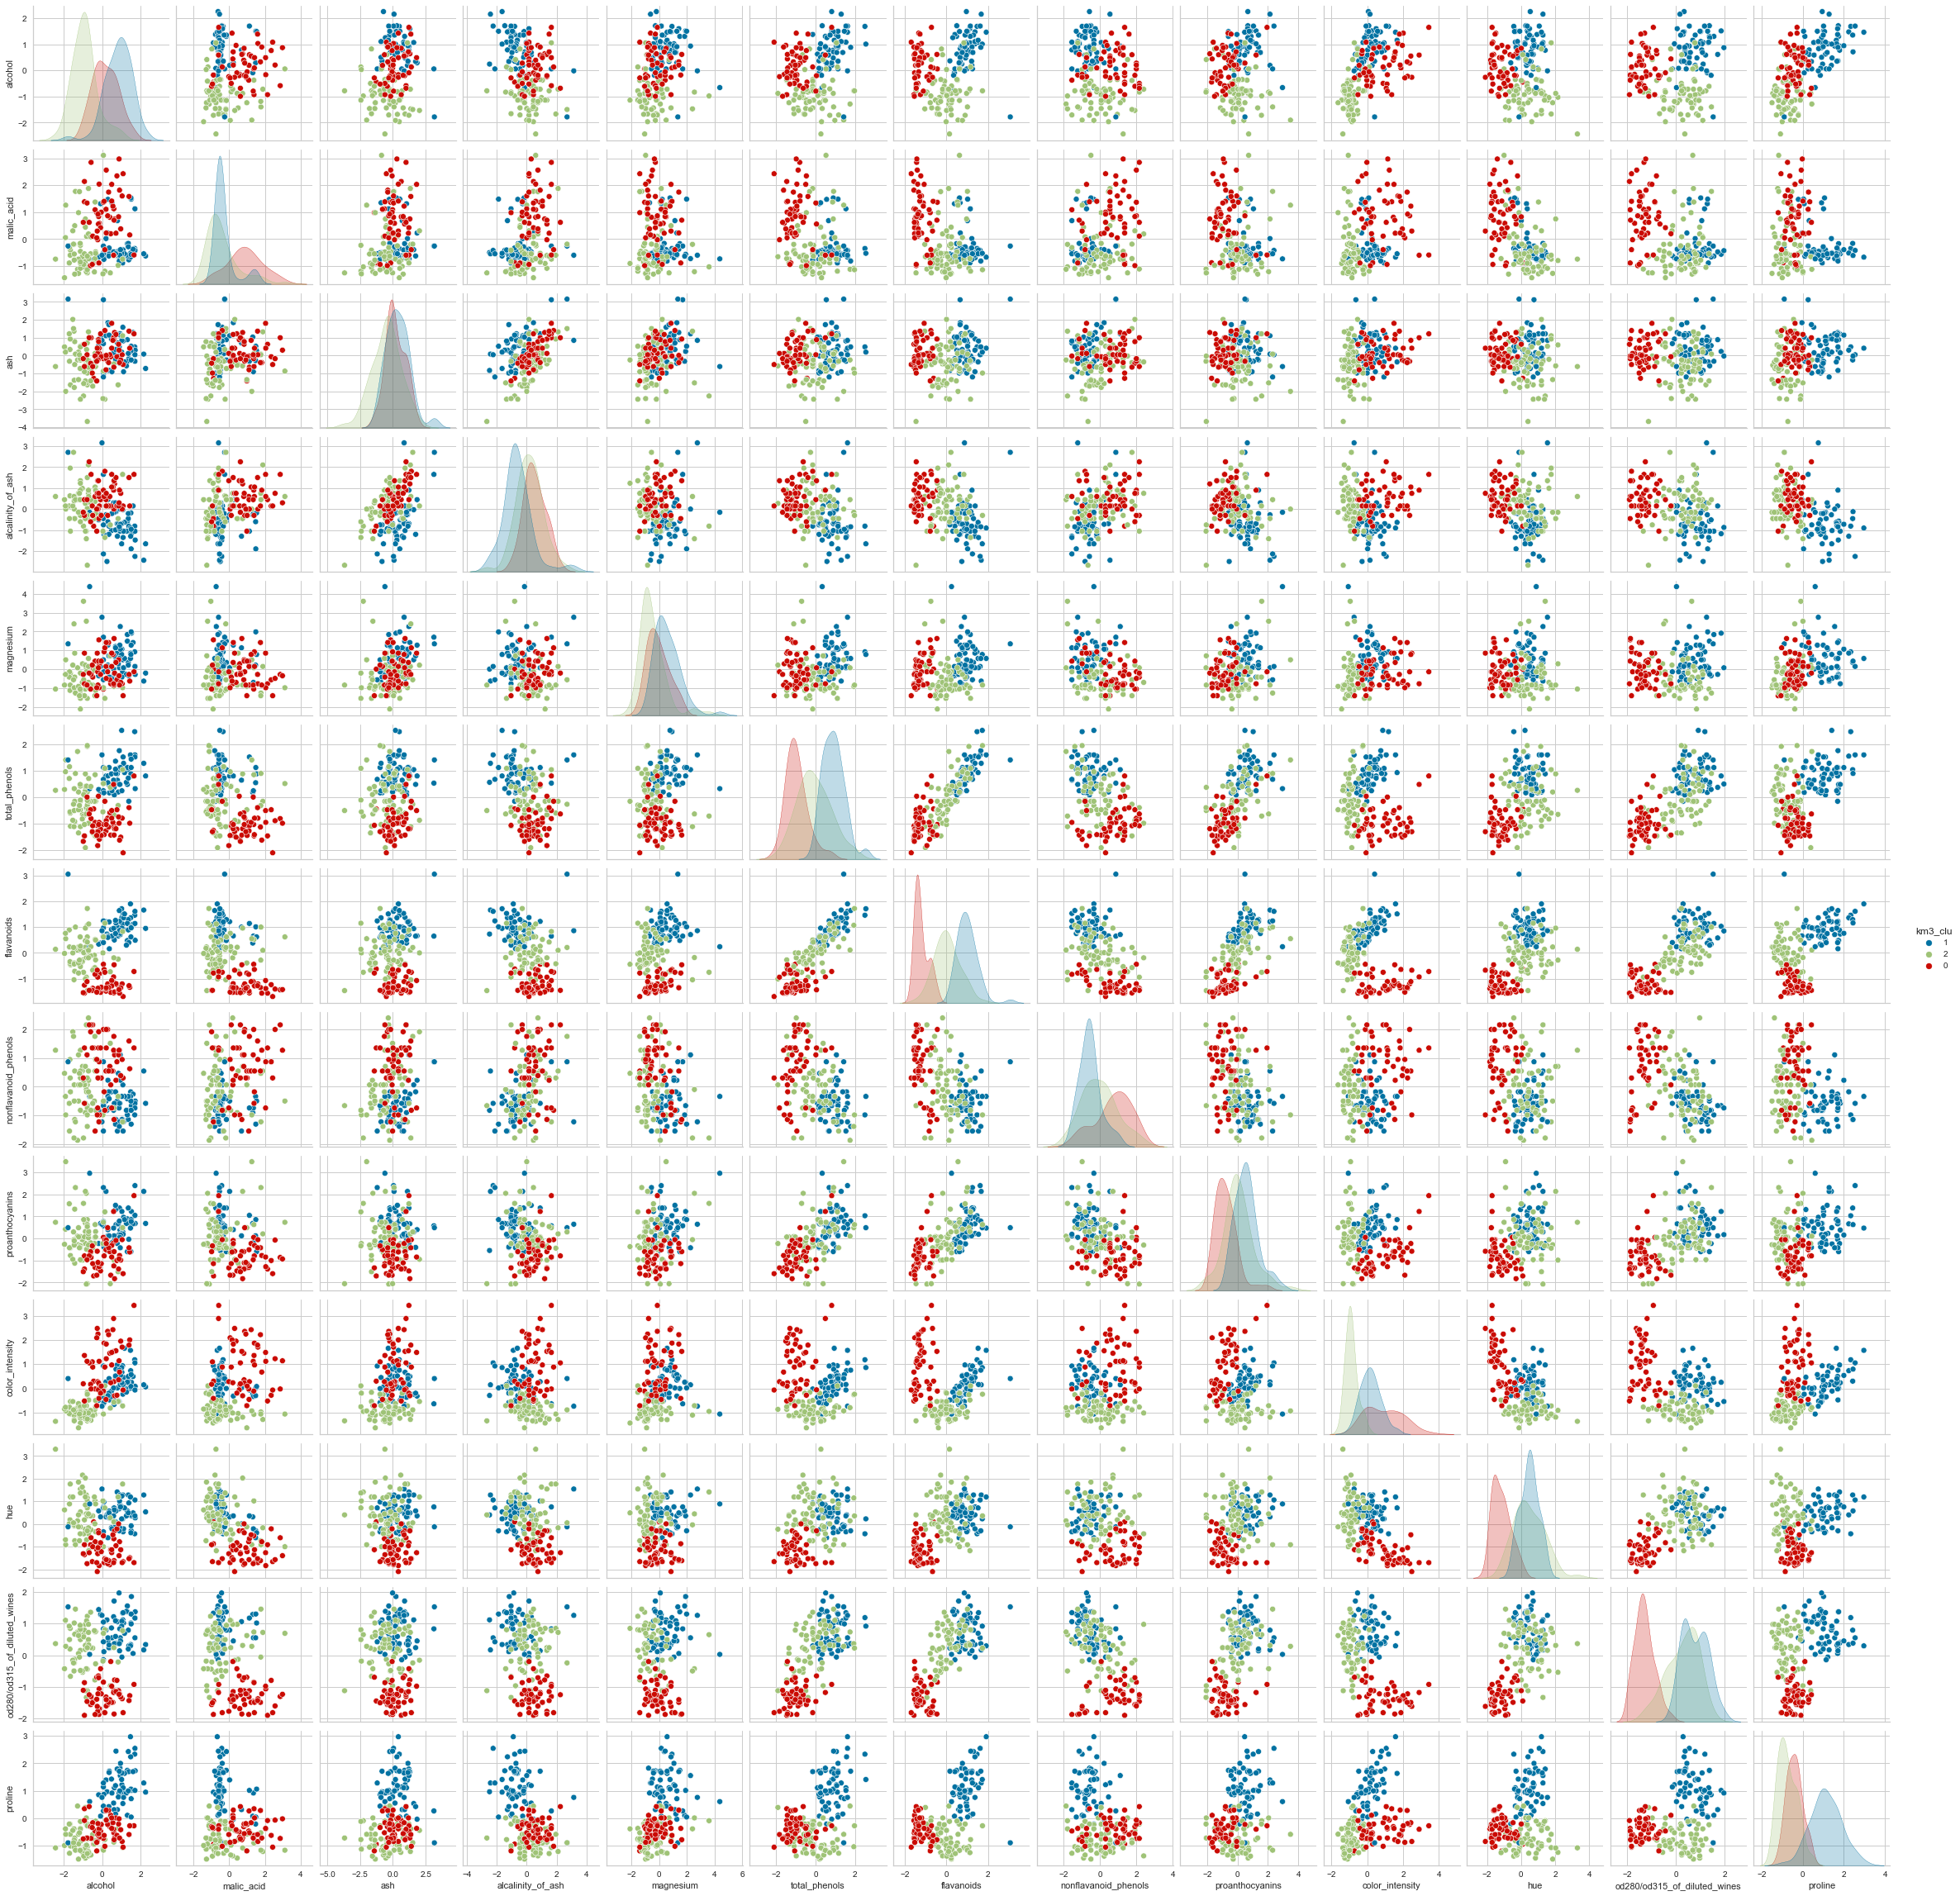

In [304]:
## Based on KMeans with 3 clusters

sns.pairplot(scaled_df_3, hue='km3_clu');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [309]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_df_3.drop('km3_clu', axis=1))

PCA(n_components=2)

In [310]:
data_pca = pca.transform(scaled_df_3.drop('km3_clu', axis=1))

In [313]:
df_pca = pd.DataFrame(data_pca, columns=['pc1', 'pc2'])
df_pca.head()

,pc1,pc2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


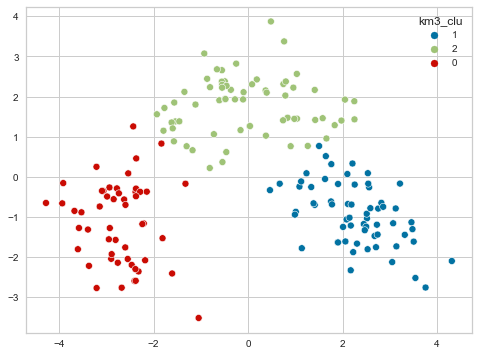

In [323]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x= data_pca[:,0], y= data_pca[:, 1], hue=scaled_df_3['km3_clu']);

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [324]:
from sklearn.manifold import TSNE

In [334]:
tsne_fit = TSNE(init = 'pca', learning_rate = 'auto', perplexity=10)
array_tsne = tsne_fit.fit_transform(scaled_df_3.drop('km3_clu', axis=1))


scaled_tsne_df = pd.DataFrame(array_tsne, columns = ['TS_1', 'TS_2'])

In [335]:
scaled_tsne_df['cluster'] = scaled_df_3['km3_clu']

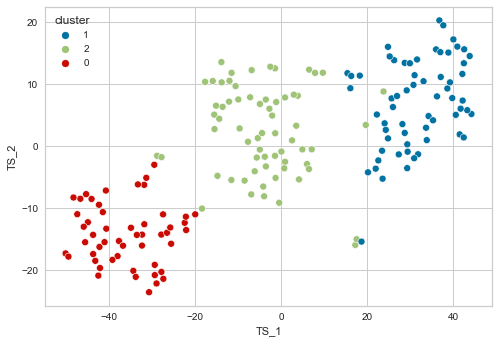

In [336]:
sns.scatterplot(data = scaled_tsne_df, x = 'TS_1', y = 'TS_2', hue='cluster');

In [338]:
def var_perp(i): ## it takes as input the number for the perplexity parameter
    tsne_fit = TSNE(init = 'pca', learning_rate = 'auto', perplexity=i)
    array_tsne = tsne_fit.fit_transform(scaled_df_3[orig_cols])
    scaled_tsne_df = pd.DataFrame(array_tsne, columns = ['TS_1', 'TS_2'])
    scaled_tsne_df['cluster'] = scaled_df_3['km3_clu']
    return sns.scatterplot(data = scaled_tsne_df, x = 'TS_1', y = 'TS_2', hue='cluster');

<AxesSubplot:xlabel='TS_1', ylabel='TS_2'>

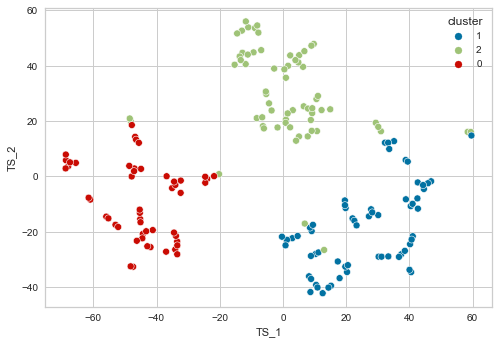

In [342]:
var_perp(3)

<AxesSubplot:xlabel='TS_1', ylabel='TS_2'>

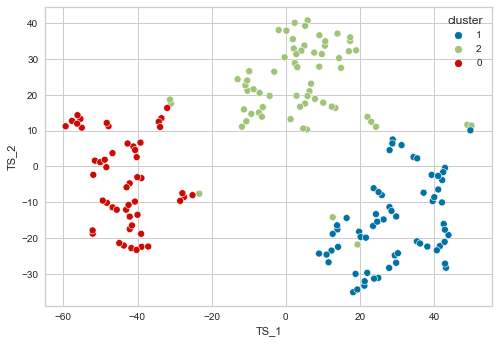

In [339]:
var_perp(5)

<AxesSubplot:xlabel='TS_1', ylabel='TS_2'>

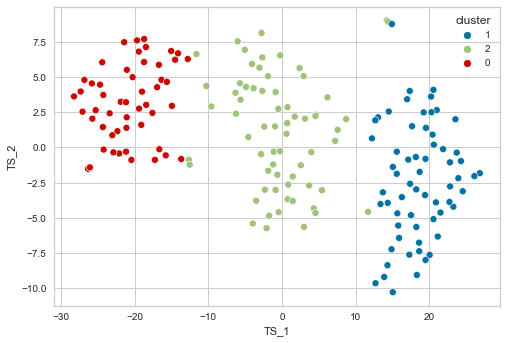

In [340]:
var_perp(20)

<AxesSubplot:xlabel='TS_1', ylabel='TS_2'>

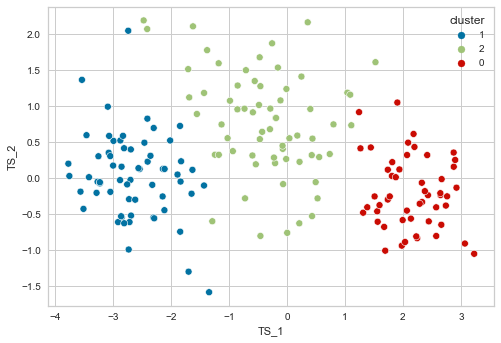

In [341]:
var_perp(100)